**[Click Me For File!!](https://raw.githubusercontent.com/whitehatjr/datasets/master/savings_data.csv)**

In [8]:
import pandas as pd
import statistics
import plotly.express as px

In [10]:
from google.colab import files
data_to_load = files.upload()

Saving savings_data.csv to savings_data (1).csv


In [9]:
df = pd.read_csv("savings_data.csv")
fig = px.scatter(df, y = "quant_saved", color = "wealthy")
fig.show()

In [11]:
import csv
import plotly.graph_objects as go

with open("savings_data.csv", newline = "") as f:
  reader = csv.reader(f)
  savings_data = list(reader)

savings_data.pop(0)

total_entries = len(savings_data)
total_people_wealthy = 0

for data in savings_data:
  if int(data[3]) == 1:
    total_people_wealthy += 1

fig = go.Figure(go.Bar(x = ["Wealthy", "Not Wealthy"], y = [total_people_wealthy, (total_entries - total_people_wealthy)]))

fig.show()

In [12]:
all_savings = []

for data in savings_data:
  all_savings.append(float(data[0]))

print(f"Mean of Savings: {statistics.mean(all_savings)}")
print(f"Median of Savings: {statistics.median(all_savings)}")
print(f"Mode of Savings: {statistics.mode(all_savings)}")

Mean of Savings: 85.32780331328739
Median of Savings: 39.2724
Mode of Savings: 0.0


In [13]:
wealthy_savings = []
not_wealthy_savings = []

for data in savings_data:
  if int(data[3]) == 1:
    wealthy_savings.append(float(data[0]))
  else:
    not_wealthy_savings.append(float(data[0]))

print("Results for people who were wealthy and saved:")
print(f"Mean of savings - {statistics.mean(wealthy_savings)}")
print(f"Median of savings - {statistics.median(wealthy_savings)}")
print(f"Mode of savings - {statistics.mode(wealthy_savings)}")

print("\n")
print("Results for people who were not wealthy and saved:")
print(f"Mean of savings - {statistics.mean(not_wealthy_savings)}")
print(f"Median of savings - {statistics.median(not_wealthy_savings)}")
print(f"Mode of savings - {statistics.mode(not_wealthy_savings)}")

Results for people who were wealthy and saved:
Mean of savings - 78.61157672384391
Median of savings - 39.2724
Mode of savings - 2.284


Results for people who were not wealthy and saved:
Mean of savings - 87.22929365730847
Median of savings - 39.2724
Mode of savings - 0.0


**STDEV = Standard Deviation**

In [14]:
print(f"STDEV of all the data -> {statistics.stdev(all_savings)}")
print(f"STDEV of people who were wealthy: {statistics.stdev(wealthy_savings)}")
print(f"STDEV of people who were not wealthy: {statistics.stdev(not_wealthy_savings)}")

STDEV of all the data -> 196.75453011909315
STDEV of people who were wealthy: 164.58072141099734
STDEV of people who were not wealthy: 204.91519933877308


In [3]:
import numpy as np

# male = []
# male_savings = []
# female = []
# female_savings = []

# for data in savings_data:
#   if float(data[1]) != 1:
#     male.append(float(data[1]))
#     male_savings.append(float(data[0]))
  
  # else:
  #   female.append(float(data[1]))
  #   female_savings.append(float(data[0]))

# male_correlation = np.corrcoef(male, male_savings)
#female_correlation = np.corrcoef(female, female_savings)

# print(f"Correlation between male and their savings is - {male_correlation[0,1]}")
#print(f"Correlation between female and their savings is - {female_correlation[0,1]}")

# **No Correlation**

In [15]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

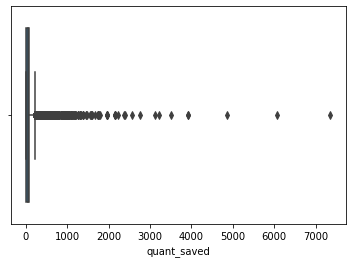

In [16]:
import seaborn as sns

sns.boxplot(data=df, x=df["quant_saved"])

In [18]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

new_df = df[df["quant_saved"] < upper_whisker]

Q1: 2.2840000000000003
Q3: 86.514
IQR: 84.22999999999999
Lower Whisker: -124.06099999999998
Upper Whisker: 212.85899999999998


In [19]:
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.200519389818794
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.866871917288634


In [20]:
import random

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

In [21]:
print(f"Stdev of the Sampling Data: {statistics.stdev(sampling_mean_list)}")

Stdev of the sampling data - 5.307775865579316


In [23]:
print(f"Mean of Population: {statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution: {mean_sampling}")

Mean of Population: 46.200519389818794
Mean of Sampling Distribution: 45.88970242453158


In [ ]:
temp_df = new_df[new_df.wealthy != 0]

wealthy = temp_df["wealthy"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(wealthy, savings)
print(f"Correlation between if the person is wealthy and their savings is: {correlation[0,1]}")

# **No Correlation**

In [27]:
wealthy_df = new_df.loc[new_df["wealthy"] == 1]
not_wealthy_df = new_df.loc[new_df["wealthy"] == 0]

print(wealthy_df.head())
print(not_wealthy_df.head())

   quant_saved  female  highschool_completed  wealthy
1      39.2724       0                     1        1
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
0     13.090800       1                     0        0
9     52.363200       1                     0        0
14    78.544800       1                     1        0
15    46.152332       1                     1        0
21     2.284000       1                     1        0


In [29]:
fig = ff.create_distplot([not_wealthy_df["quant_saved"].tolist()], ["Savings (Not Wealthy)"], show_hist=False)
fig.show()

In [31]:
not_wealthy_savings = not_wealthy_df["quant_saved"].tolist()

sampling_mean_list_not_wealthy = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_wealthy_savings))
  sampling_mean_list_not_wealthy.append(statistics.mean(temp_list))

mean_sampling_not_wealthy = statistics.mean(sampling_mean_list_not_wealthy)
stdev_sampling_not_wealthy = statistics.stdev(sampling_mean_list_not_wealthy)

print(f"Mean of Sampling (Not Wealthy): {mean_sampling_not_wealthy}")
print(f"STDEV of Sampling (Not Wealthy): {stdev_sampling_not_wealthy}")
fig = ff.create_distplot([sampling_mean_list_not_wealthy], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Not Wealthy): 45.61819484874683
STDEV of Sampling (Not Wealthy): 5.162614909131902


In [33]:
first_stdev_start = mean_sampling_not_wealthy - stdev_sampling_not_wealthy
first_stdev_end = mean_sampling_not_wealthy + stdev_sampling_not_wealthy
print(f"First (start): {first_stdev_start} and First (end): {first_stdev_end}")

second_stdev_start = mean_sampling_not_wealthy - (2 * stdev_sampling_not_wealthy)
second_stdev_end = mean_sampling_not_wealthy + (2 * stdev_sampling_not_wealthy)
print(f"Second (start): {second_stdev_start} and Second (end): {second_stdev_end}")

third_stdev_start = mean_sampling_not_wealthy - (3 * stdev_sampling_not_wealthy)
third_stdev_end = mean_sampling_not_wealthy + (3 * stdev_sampling_not_wealthy)
print(f"Third (start): {third_stdev_start} and Third (end): {third_stdev_end}")

First (start): 40.45557993961493 and First (end): 50.780809757878735
Second (start): 35.29296503048303 and Second (end): 55.94342466701063
Third (start): 30.130350121351128 and Third (end): 61.106039576142535


In [35]:
wealthy_savings = wealthy_df["quant_saved"].tolist()

sampling_mean_list_wealthy = []
for i in range(1000):
  temp_list = []

  for j in range(100):
    temp_list.append(random.choice(wealthy_savings))

  sampling_mean_list_wealthy.append(statistics.mean(temp_list))

mean_sampling_wealthy = statistics.mean(sampling_mean_list_wealthy)
stdev_sampling_wealthy = statistics.stdev(sampling_mean_list_wealthy)

print(f"Mean of Sampling (wealthy): {mean_sampling_wealthy}")
print(f"Standard Deviation of Sampling (wealthy): {stdev_sampling_wealthy}")
fig = ff.create_distplot([sampling_mean_list_wealthy], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (wealthy): 48.61285405340682
Standard Deviation of Sampling (wealthy): 5.061624278006013


In [37]:
z_score = (mean_sampling_wealthy - mean_sampling_not_wealthy) / stdev_sampling_not_wealthy
print(f"Z-Score is: {z_score}")

Z-Score is: 0.5800663534603133
